In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import IPython.display as ipd
from librosa import display
import librosa

In [104]:
dir1="C:\\Users\\tlsck\\IMPRESS\\Data\\TAU-urban-acoustic-scenes-2020-mobile-development\\train.csv"
dir_test="C:\\Users\\tlsck\\IMPRESS\\Data\\TAU-urban-acoustic-scenes-2020-mobile-development\\evaluate.csv"
dir2="C:\\Users\\tlsck\\IMPRESS\\Data\\TAU-urban-acoustic-scenes-2020-mobile-development\\"
data=pd.read_csv(dir1)
data.head()


,filename,scene_label
0,audio/airport-lisbon-1000-40000-a.wav,0
1,audio/airport-prague-1015-40019-a.wav,0
2,audio/airport-prague-1023-40027-a.wav,0
3,audio/airport-prague-1023-40038-a.wav,0
4,audio/airport-prague-1034-40041-a.wav,0


In [105]:
y,sr=librosa.load(dir2+"audio\\"+"airport-barcelona-0-0-a.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape
ipd.Audio(y,rate=sr)

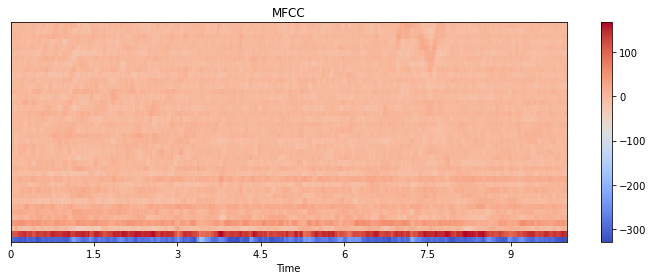

In [106]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


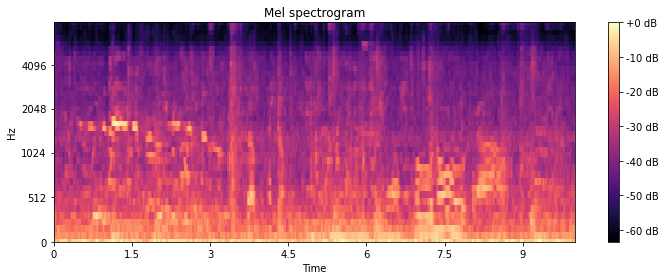

In [107]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

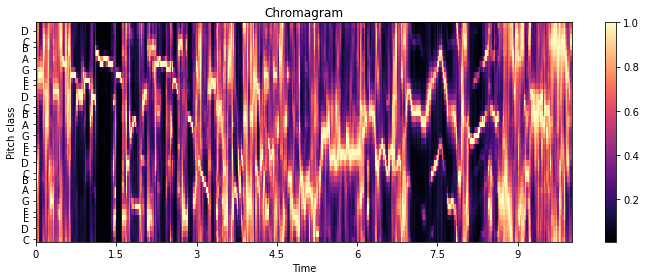

In [108]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

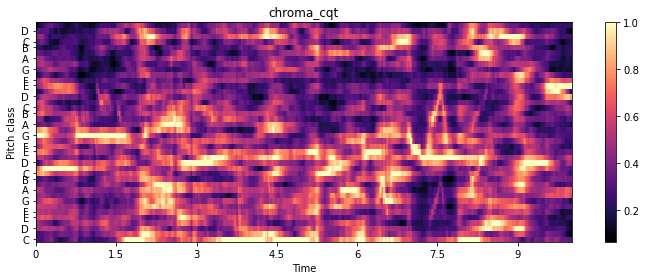

In [109]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

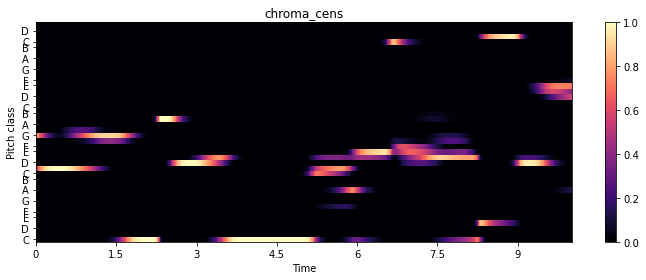

In [110]:

#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [111]:
#feature set
y,sr=librosa.load(dir2+"audio\\"+"airport-barcelona-0-1-a.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape
ipd.Audio(y,rate=sr)

In [112]:

#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [113]:
len(data)

13962

In [114]:
data

,filename,scene_label
0,audio/airport-lisbon-1000-40000-a.wav,0
1,audio/airport-prague-1015-40019-a.wav,0
2,audio/airport-prague-1023-40027-a.wav,0
3,audio/airport-prague-1023-40038-a.wav,0
4,audio/airport-prague-1034-40041-a.wav,0
...,...,...
13957,audio/tram-barcelona-180-5570-s3.wav,9
13958,audio/tram-helsinki-184-5738-s3.wav,9
13959,audio/tram-lisbon-1131-43892-s3.wav,9
13960,audio/tram-london-188-5815-s3.wav,9


In [115]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in tqdm(range(len(data))):
    file=data.iloc[i]["filename"]
    label=data.iloc[i]["scene_label"]
    filename=dir2+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    x_train.append(features)
    y_train.append(label)

 10%|███████▌                                                                   | 1409/13962 [15:33<2:14:34,  1.55it/s]C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
100%|██████████████████████████████████████████████████████████████████████████| 13962/13962 [2:32:25<00:00,  1.53it/s]


In [116]:
test=pd.read_csv(dir_test)

for i in tqdm(range(len(test))):
    file=test.iloc[i]["filename"]
    label=test.iloc[i]["scene_label"]
    filename=dir2+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    x_test.append(features)
    y_test.append(label)
    

100%|██████████████████████████████████████████████████████████████████████████████| 2968/2968 [32:27<00:00,  1.52it/s]


In [23]:
"""
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path=dir2+"\\audio\\fold"
for i in tqdm(range(len(data))):
    a=fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"\\"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)
""" 


100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [16:24<00:00,  8.87it/s]


In [24]:
"""
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path=dir2+"\\audio\\fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"\\"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)
"""

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [38:49<00:00,  3.75it/s]


In [117]:

len(x_train)+len(x_test)

16930

In [118]:
len(data)

13962

In [119]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13962, 40, 5), (2968, 40, 5), (13962,), (2968,))

In [120]:

#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
#x_train_2d=np.reshape(x_train,(13962,200)
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
#x_test_2d=np.reshape(x_test,(2968,200))
x_train_2d.shape,x_test_2d.shape

((13962, 200), (2968, 200))

In [121]:

#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")